#EOSC 511
##Assignment 4, Lab4
Tereza Jarníková
Student number: 81586142

**Problems:**

    -   2: Tableau

    -   3: RK4 comparison

    -   4: Embedded
    
    -   Programming A
    
    -   Programming B
    
    -   Programming C
    

#####Problem 2 - tableau: 
Write out the tableau for:
-Heun’s method
-the fourth-order Runge-Kutta method discussed in the next section.

#####Problem 2 - tableau solution: 

In the form used by the lab, the tableau for Heun's method is as follows:

$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &c_i \\ \hline
1 & 0 &0 & \frac{1}{4}\\ 
2 & \frac{2}{3} &\frac{2}{3} & \frac{3}{4}\\\hline 
{j=} & 1 &  2 & \\ \hline
\end{array}
$$ 




The tableau for the 4th order R-K method given is as follows:


$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &  &  && c_i \\ \hline
1 & 0 &0 & 0 & 0 && \frac{1}{6}\\ 
2 & \frac{1}{2} &\frac{1}{2} & 0 & 0 && \frac{1}{3}\\ 
3 & \frac{1}{2} &0 & \frac{1}{2} & 0 && \frac{1}{3}\\ 
4 & 1 & 0 & 0 & 1 && \frac{1}{6}\\\hline 
{j=} & 1 &  2 & 3 & 4 \\ \hline
\end{array}
$$ 


#####Problem 3 - Runge-Kutta Comparison: 
In the demo below, compare compare solutions to the test
problem (eq: test)

$$
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test}
$$ 

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.

1.  Based on the numerical solutions of (eq: test), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

#####Problem 3 - R-K comparison solution: 

1) To compare the accuracy of the 3 numerical methods, I printed their solutions at each timestep in the interval between 0 and 1 (For ease of formatting, I then inputted these values into an excel spreadsheet). The answers are below - we can clearly see that the R-K method is most accurate, with a global error at t = 1 on the order of 1E-8, while the midpoint method had a global error on the order of 1E-6 and the euler method had a global error on the order of 1E-4. 

2) 


The time is
[ 0.       0.00625  0.0125   0.01875  0.025    0.03125  0.0375   0.04375
  0.05     0.05625  0.0625   0.06875  0.075    0.08125  0.0875   0.09375
  0.1      0.10625  0.1125   0.11875  0.125    0.13125  0.1375   0.14375
  0.15     0.15625  0.1625   0.16875  0.175    0.18125  0.1875   0.19375
  0.2      0.20625  0.2125   0.21875  0.225    0.23125  0.2375   0.24375
  0.25     0.25625  0.2625   0.26875  0.275    0.28125  0.2875   0.29375
  0.3      0.30625  0.3125   0.31875  0.325    0.33125  0.3375   0.34375
  0.35     0.35625  0.3625   0.36875  0.375    0.38125  0.3875   0.39375
  0.4      0.40625  0.4125   0.41875  0.425    0.43125  0.4375   0.44375
  0.45     0.45625  0.4625   0.46875  0.475    0.48125  0.4875   0.49375
  0.5      0.50625  0.5125   0.51875  0.525    0.53125  0.5375   0.54375
  0.55     0.55625  0.5625   0.56875  0.575    0.58125  0.5875   0.59375
  0.6      0.60625  0.6125   0.61875  0.625    0.63125  0.6375   0.64375
  0.65     0.65625  0.6625   0.66875  0

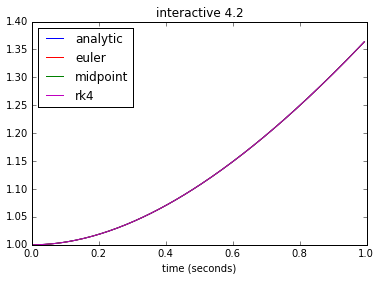

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.00625,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2')


print("The time is")
print(timeVec)
for i in range(0,len(timeVec)):
    
    print(yrk[i]-analytic[i])
    #-analytic[i]
print("Analytic Soln")
print(analytic)
print("Euler Method Soln")
print(analytic-ye)
print("Euler Method Soln Error")
print("Midpoint Soln")
print(analytic-ym)
print("R-K Soln")
print(analytic-yrk)

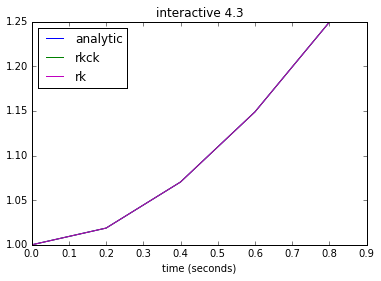

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
l3=theAx.plot(timeVec,yrk,'m-',label='rk')
theAx.legend(loc='best')
theAx.set_title('interactive 4.3')

###Problem Coding A:

As set up above, test.py
solved the damped, harmonic oscillator with the (unstable) forward Euler method.

1.  Write a new routine that solves the harmonic oscilator using [Heun’s method](#eq_heuns)
    along the lines of the routines in [lab4_functions.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/lab4_functions.py)

    Hand in a notebook with the code and a plot.
    
To solve this, I rewrote the example with an additional code, modified from 

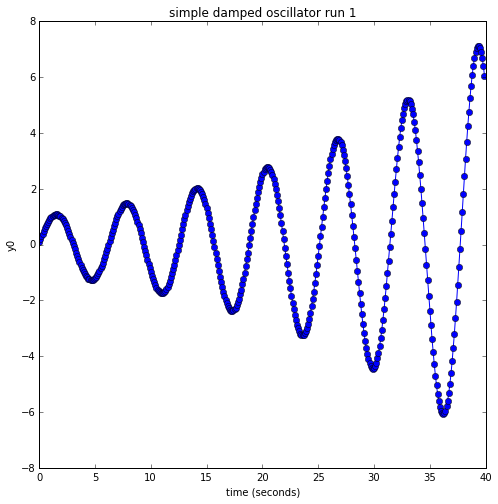

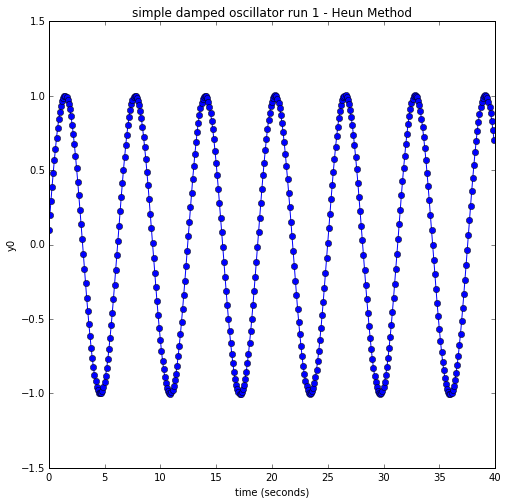

In [12]:
%matplotlib inline
import numpy as np
import json
from numlabs.lab4.example.test import read_init,euler4, heun
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=euler4(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0') 

initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':.1,'c1':0.,'c2':1.0}
initialVals['comment'] = 'written Oct. 6, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1 - Heun Method'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)


#wooo heun's method

time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0') 

<a name="prob_b"></a>    
**problem coding B**:

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. $$f(y,t) = t - y  + 1.0$$ Choose two sets
    of initial conditions and investigate the behaviour.

2.  Is there any difference between the two methods when applied to
    either problem? Should there be? Explain by analyzing the steps
    that each method is taking.